# LAB02: Decision Tree with scikit-learn

## The overview about the lab (description, source, ...)

There are 1,025,010 records in the data set. Each of which is an example of a hand consisting of five 
playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit 
and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the 
"Poker Hand". The order of cards is important, which is why there are 480 possible Royal Flush 
hands as compared to 4

## Assignment requirements
You are asked to write a Python program and use scikit-learn functions to fulfill the following tasks. 
Although there is no strict rule on how to organize the code, each task should be noted carefully and 
it must reflect all the requirements mentioned.

## Task 1: Preparing the data sets
- This task prepares the training sets and test sets for the incoming experiments.
- Starting with the data provided in this folder, you need to manually merge the two files, poker-hand-training-true.data and poker-hand-testing.data, into a single CSV file, named poker-hand-data.csv

- There will be experiments on training sets and test sets of different proportions, including (train/test) 40/60, 60/40, 80/20, and 90/10

In [19]:
# those below libraries are neccessary for lab work
import pandas as pd
from sklearn.model_selection import train_test_split


# we needs to prepare 2 .data file before working with .csv file.
# read_csv is a method to read .csv, .data,... file, it returns data as DataFrame (which is popular in pandas)

# prepare training set
train_data = pd.read_csv('poker-hand-training-true.data', header=None)

# prepare test set
test_data = pd.read_csv('poker-hand-testing.data', header = None)

# merge 2 file in to 1.
merged_data = pd.concat([train_data, test_data], ignore_index=True)

# save the merged data as .csv file.
merged_data.to_csv('poker-hand-data.csv', index=False)


datasets = pd.read_csv('poker-hand-data.csv')
datasets = datasets.to_numpy()
label = datasets[:, -1]
datasets = datasets[:, :-1]
# Prepare the size.
train_sizes = [0.4, 0.6, 0.8, 0.9]
test_sizes = [0.6, 0.4, 0.2, 0.1]
subsets = []

for train_size, test_size in zip(train_sizes, test_sizes):
    feature_train, feature_test, label_train, label_test = train_test_split(datasets, label, train_size=train_size, test_size=test_size, 
                                                                            stratify=label, shuffle=True, random_state=0)
    subsets.append((feature_train, feature_test, label_train, label_test))
    print(f"Train size: {train_size}, Test size: {test_size}")
    print(f"Train set size: {len(feature_train)}, Test set size: {len(feature_test)}")




Train size: 0.4, Test size: 0.6
Train set size: 410004, Test set size: 615006
Train size: 0.6, Test size: 0.4
Train set size: 615006, Test set size: 410004
Train size: 0.8, Test size: 0.2
Train set size: 820008, Test set size: 205002
Train size: 0.9, Test size: 0.1
Train set size: 922509, Test set size: 102501


## Visualize the distributions using bar chart

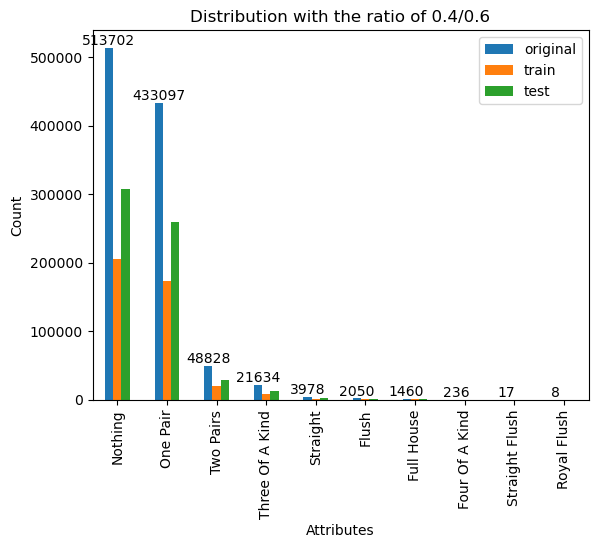

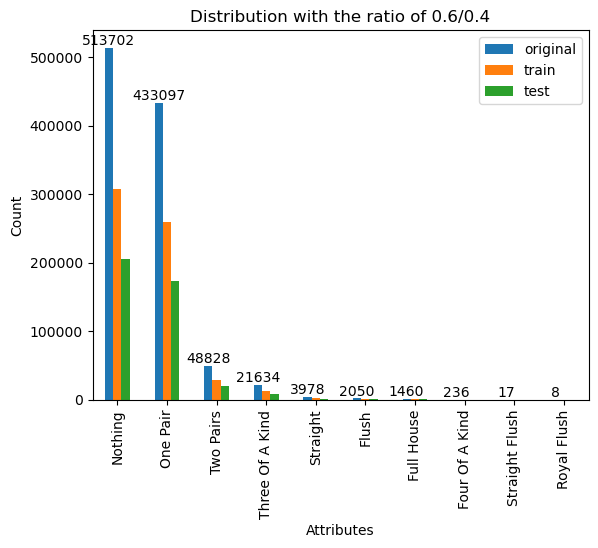

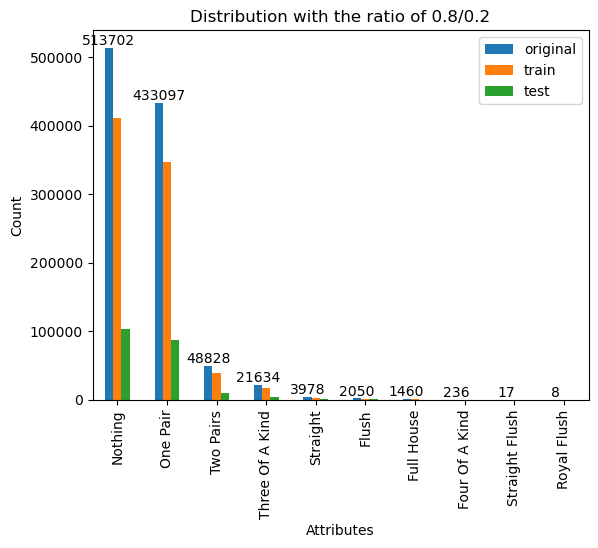

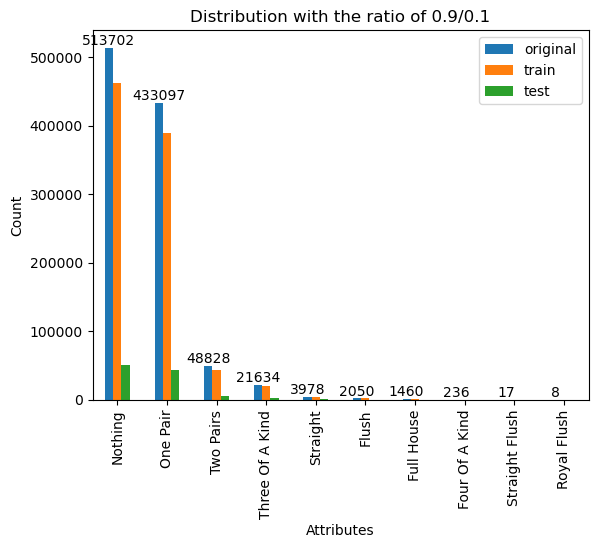

In [20]:
import matplotlib.pyplot as plt
attributes= ["Nothing", "One Pair", "Two Pairs", "Three Of A Kind", "Straight", "Flush", "Full House", "Four Of A Kind", "Straight Flush", "Royal Flush"]

def visualize_distributions(original, train, test, title):
    total_original_data = pd.DataFrame(original).value_counts()
    total_training_data = pd.DataFrame(train).value_counts()
    total_test_data = pd.DataFrame(test).value_counts()
    df = pd.DataFrame({'original': total_original_data,
                    'train': total_training_data,
                    'test': total_test_data})
    ax = df.plot(kind='bar', xlabel="Attributes", ylabel="Count", title=title)
    ax.set_xticklabels(attributes, rotation='vertical')
    ax.bar_label(ax.containers[0])
    plt.show()
for index, subset in enumerate(subsets):
    if index > 3: 
        break
    feature_train, feature_test, label_train, label_test = subset
    train_size = train_sizes[index]
    test_size = test_sizes[index]
    visualize_distributions(label, label_train, label_test, 'Distribution with the ratio of ' + str(train_size) + '/' + str(test_size))

    

    


## Task 2: Building the decision tree.

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import display
import graphviz

feature_names = ['Suit1','Rank1','Suit2','Rank2','Suit3','Rank3','Suit4','Rank4','Suit5','Rank5']

def build_decision_tree(feature_train, label_train):
    clf = DecisionTreeClassifier(criterion = 'entropy')
    clf.fit(feature_train, label_train)
    dot_data = export_graphviz(clf, out_file=None, class_names=attributes, feature_names=feature_names,
                               filled=True, max_depth=5, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [22]:
!pip install graphviz

0 -> 4 means [feature_train], [feature_test], [label_train], [label_test]

### Decision tree for the ratio of 40/60

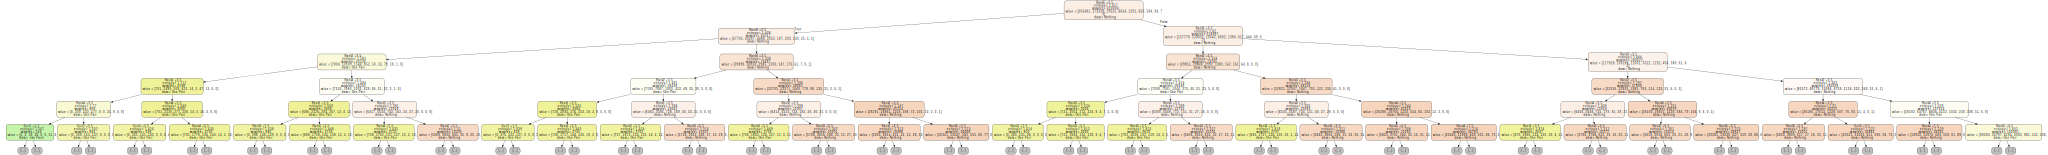

In [23]:
feature_train, feature_test, label_train, label_test = subsets[0]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 60/40

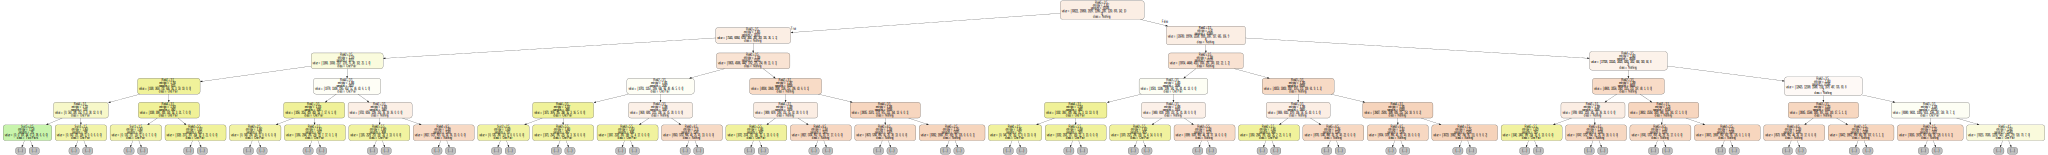

In [24]:
feature_train, feature_test, label_train, label_test = subsets[1]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 80/20

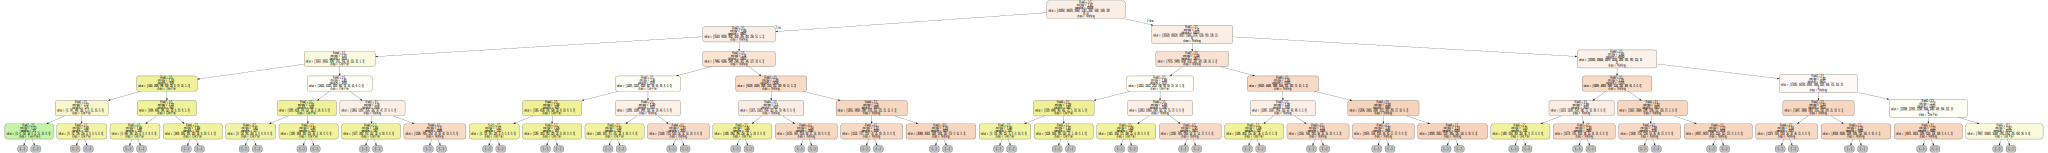

In [25]:
feature_train, feature_test, label_train, label_test = subsets[2]
build_decision_tree(feature_train, label_train)

### Decision tree for the ratio of 90/10

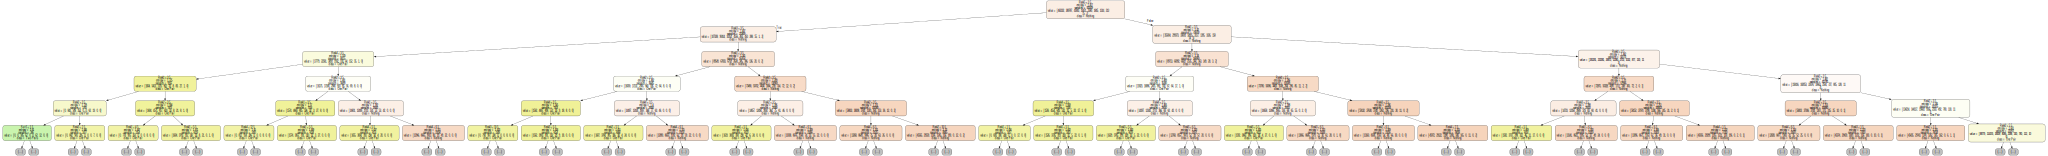

In [26]:
feature_train, feature_test, label_train, label_test = subsets[3]
build_decision_tree(feature_train, label_train)

## Classification Report & Confusion Matrix

- For each of the above decision tree classifiers, predict the examples in the corresponding test set, and make a report using classification_report and confusion_matrix.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def get_classification_report(feature_test, label_test, train_size, test_size):
    clf = DecisionTreeClassifier(criterion = 'entropy')
    clf.fit(feature_train, label_train)
    label_pred = clf.predict(feature_test)
    print("Classification Report for: " + str(train_size) + "/" + str(test_size))
    print(classification_report(label_test, label_pred, target_names=attributes, digits=3))
    print()
    
def draw_confusion_matrix(feature_test, label_test, train_size, test_size):
    clf = DecisionTreeClassifier(criterion = 'entropy')
    clf.fit(feature_train, label_train)
    label_pred = clf.predict(feature_test)
    cm = confusion_matrix(label_test, label_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for the ratio: ' + str(train_size) + '/' + str(test_size))
    plt.xticks(ticks=range(len(attributes)), labels=attributes, rotation='vertical')
    plt.show()


### For the ratio of: 40/60

Classification Report for: 40/60
                 precision    recall  f1-score   support

        Nothing      0.707     0.697     0.702    308221
       One Pair      0.579     0.577     0.578    259858
      Two Pairs      0.270     0.292     0.281     29297
Three Of A Kind      0.282     0.313     0.297     12980
       Straight      0.229     0.260     0.243      2387
          Flush      0.054     0.086     0.067      1230
     Full House      0.092     0.113     0.101       876
 Four Of A Kind      0.158     0.190     0.173       142
 Straight Flush      0.000     0.000     0.000        10
    Royal Flush      0.000     0.000     0.000         5

       accuracy                          0.615    615006
      macro avg      0.237     0.253     0.244    615006
   weighted avg      0.619     0.615     0.617    615006




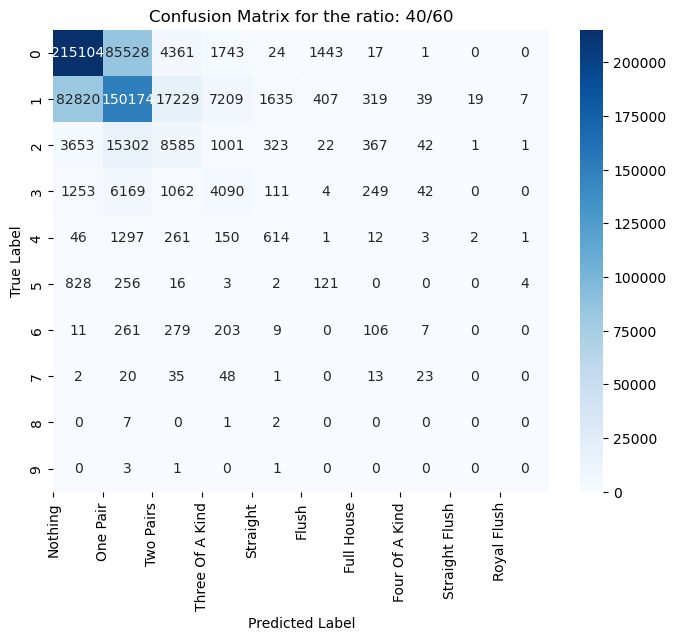

In [28]:
feature_train, feature_test, label_train, label_test = subsets[0]
get_classification_report(feature_test, label_test, 40, 60)
draw_confusion_matrix(feature_test, label_test, 40, 60)

### For the raito of 60/40

Classification Report for: 60/40
                 precision    recall  f1-score   support

        Nothing      0.724     0.716     0.720    205481
       One Pair      0.600     0.595     0.598    173239
      Two Pairs      0.287     0.312     0.299     19531
Three Of A Kind      0.332     0.367     0.349      8654
       Straight      0.251     0.284     0.266      1591
          Flush      0.052     0.083     0.064       820
     Full House      0.136     0.159     0.147       584
 Four Of A Kind      0.153     0.160     0.156        94
 Straight Flush      0.000     0.000     0.000         7
    Royal Flush      0.000     0.000     0.000         3

       accuracy                          0.635    410004
      macro avg      0.253     0.268     0.260    410004
   weighted avg      0.638     0.635     0.636    410004




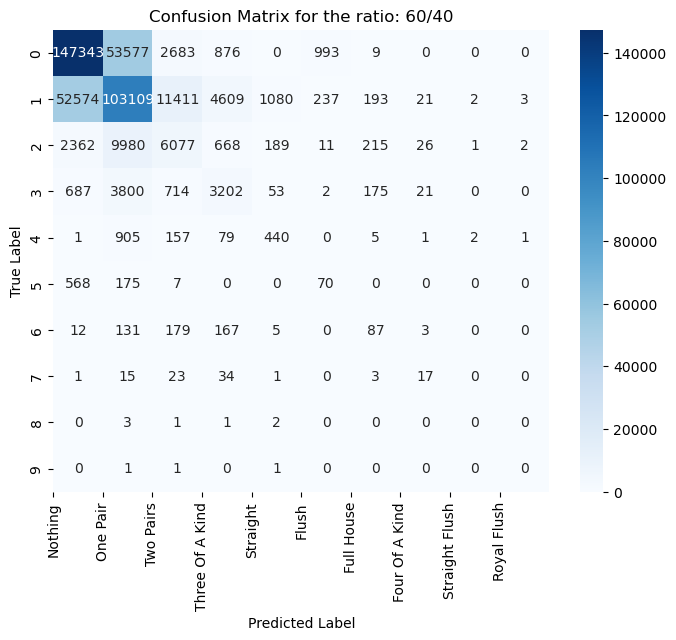

In [29]:
feature_train, feature_test, label_train, label_test = subsets[1]
get_classification_report(feature_test, label_test, 60, 40)
draw_confusion_matrix(feature_test, label_test, 60, 40)

### For the ratio of 80/20

Classification Report for: 80/20
                 precision    recall  f1-score   support

        Nothing      0.733     0.725     0.729    102740
       One Pair      0.611     0.610     0.611     86619
      Two Pairs      0.311     0.330     0.320      9766
Three Of A Kind      0.368     0.395     0.381      4327
       Straight      0.278     0.309     0.293       796
          Flush      0.082     0.122     0.098       410
     Full House      0.166     0.195     0.179       292
 Four Of A Kind      0.136     0.191     0.159        47
 Straight Flush      0.000     0.000     0.000         3
    Royal Flush      0.000     0.000     0.000         2

       accuracy                          0.647    205002
      macro avg      0.268     0.288     0.277    205002
   weighted avg      0.650     0.647     0.648    205002




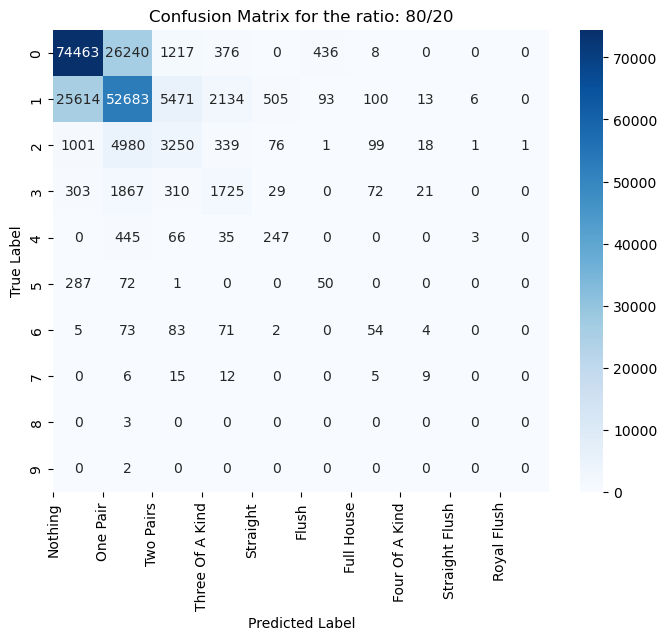

In [30]:
feature_train, feature_test, label_train, label_test = subsets[2]
get_classification_report(feature_test, label_test, 80, 20)
draw_confusion_matrix(feature_test, label_test, 80, 20)

### For the ratio of: 90/10

Classification Report for: 90/10
                 precision    recall  f1-score   support

        Nothing      0.741     0.732     0.737     51370
       One Pair      0.621     0.618     0.619     43310
      Two Pairs      0.320     0.344     0.332      4883
Three Of A Kind      0.369     0.415     0.390      2163
       Straight      0.304     0.319     0.311       398
          Flush      0.083     0.132     0.102       205
     Full House      0.160     0.199     0.177       146
 Four Of A Kind      0.083     0.130     0.102        23
 Straight Flush      0.000     0.000     0.000         2
    Royal Flush      0.000     0.000     0.000         1

       accuracy                          0.655    102501
      macro avg      0.268     0.289     0.277    102501
   weighted avg      0.658     0.655     0.656    102501




C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


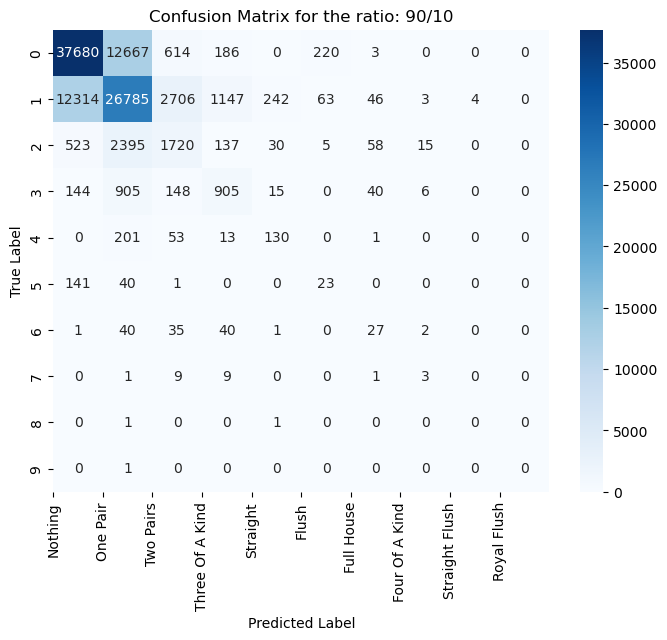

In [31]:
feature_train, feature_test, label_train, label_test = subsets[3]
get_classification_report(feature_test, label_test, 90, 10)
draw_confusion_matrix(feature_test, label_test, 90, 10)

# The depth and accuracy of a decision tree

## Brief description:
- This task works on the 80/20 training set and test set. 
- Specify the maximum depth of a decision tree by varying the parameter max_depth of sklearn.tree.DecisionTreeClassifier.
- Try the following values for parameter max_depth: None, 2, 3, 4, 5, 6, and 7
- Provide the decision tree drawn by graphviz for each max_depth value
- Report the accuracy_score (on the test set) of the decision tree classifier when changing the value of parameter max_depth.

In [32]:
from sklearn.metrics import accuracy_score

max_depths_values = [None, 2, 3, 5, 6, 7]
results_tab = []
feature_train, feature_test, label_train, label_test = subsets[2]

def draw_decision_tree_with_max_depth(feature_train, label_train, max_depth):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(feature_train, label_train)
    
    label_pred = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, label_pred)
    results_tab.append([max_depth, accuracy])
    
    if max_depth == None:
        max_depth = 10
    dot_data = export_graphviz(clf, out_file=None, class_names=attributes, feature_names=feature_names,
                               filled=True, max_depth=max_depth, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    


    

## max_depth = None

In [33]:
draw_decision_tree_with_max_depth(feature_train, label_train, None)

## max_depth = 2

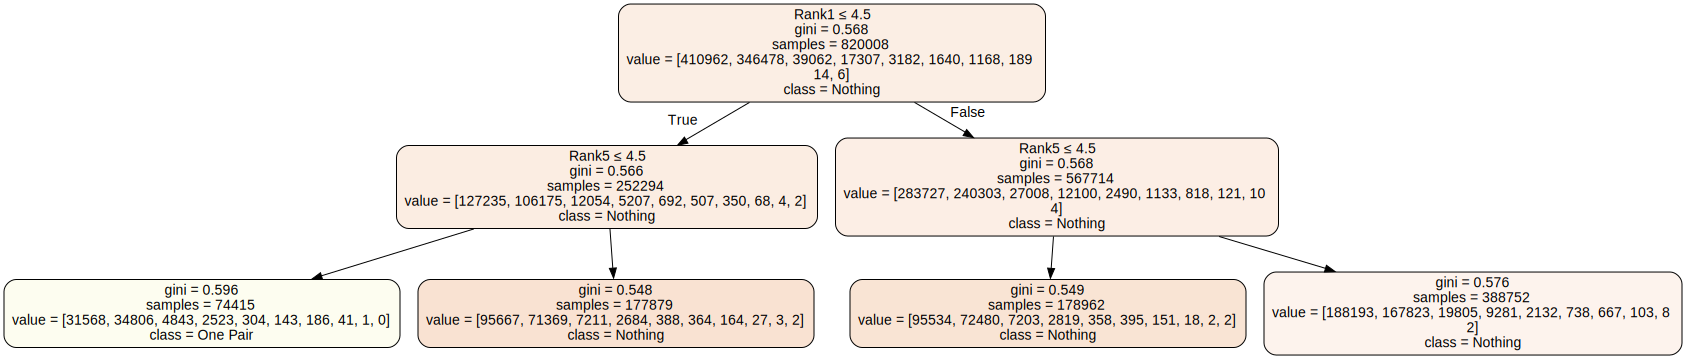

In [34]:
draw_decision_tree_with_max_depth(feature_train, label_train, 2)

## max_depth = 3

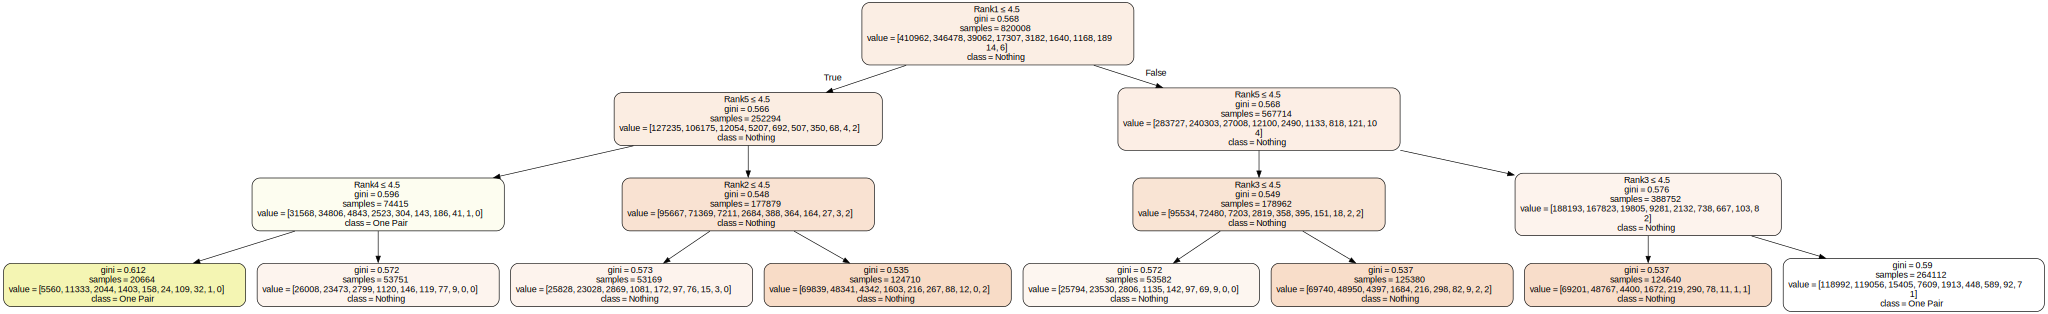

In [35]:
draw_decision_tree_with_max_depth(feature_train, label_train, 3)

## max_depth = 4

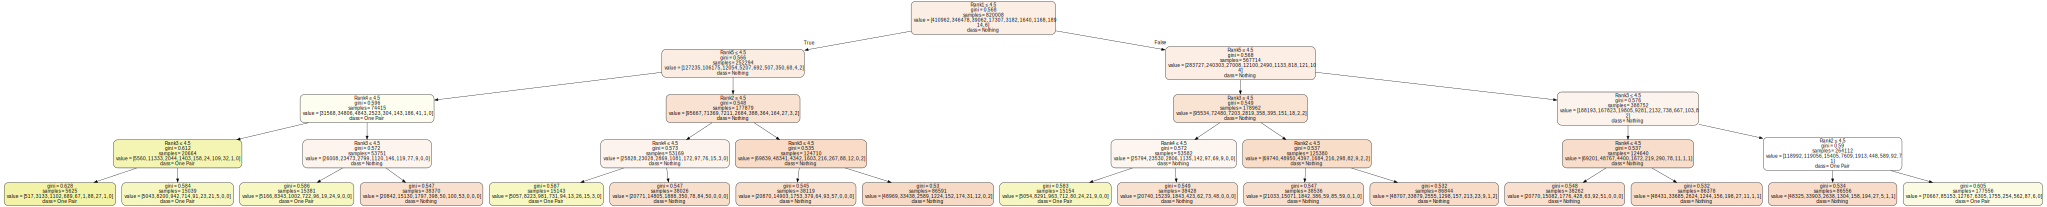

In [36]:
draw_decision_tree_with_max_depth(feature_train, label_train, 4)

## max_depth = 5

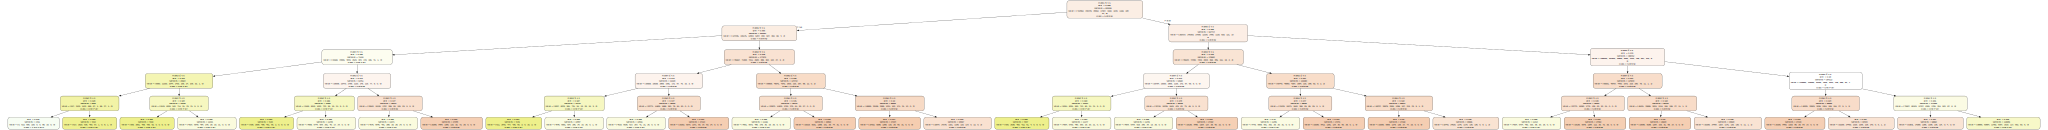

In [37]:
draw_decision_tree_with_max_depth(feature_train, label_train, 5)

## max_depth = 6

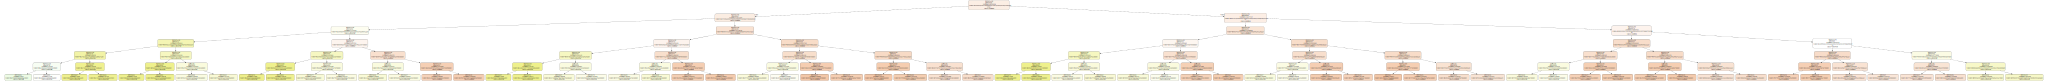

In [38]:
draw_decision_tree_with_max_depth(feature_train, label_train, 6)

## max_depth = 7

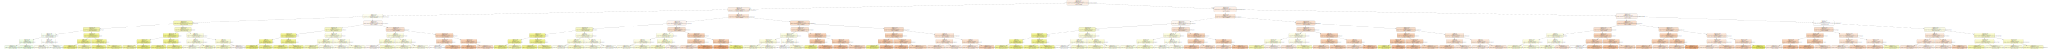

In [39]:
draw_decision_tree_with_max_depth(feature_train, label_train, 7)

## Result table:

In [40]:
results_table = pd.DataFrame(results_tab, columns=['max_depth', 'accuracy_score'])
print(results_table)

   max_depth  accuracy_score
0        NaN        0.637682
1        2.0        0.505522
2        3.0        0.509761
3        4.0        0.537097
4        5.0        0.554458
5        6.0        0.554385
6        7.0        0.558404
